

1. Normalizar los tiempos a segundos
2. Encontrar el dia que más duración de series vio
3. Encontrar la pelicula que más veces vio (Clicks y tiempo)
4. Top "K" Series (Tiempo visto, Ocurrencias)
5. Dispositivo con más ocurrencias
6. Cuantos dias vi netflix



1. Contabilizar el dispositivo con el que más títulos se reprodujeron.

2. Encontrar la película con más ocurrencias y la película con mayor duración total.

3. Generar un TOP “N” de series vistas y graficar.
Por tiempo visto
Por ocurrencias

4. Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

5. Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

6. Total de días de todos los títulos reproducidos.



#Inicio

In [1]:
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt
import seaborn as sns
#Importo Librerias

In [2]:
Tabla = pd.read_csv("NetflixHistory.csv")
Tabla
#Guardo el archivo

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


##a) Normalizar

In [3]:
#Declaro una función
def normalizar (hora):
    sec = 0;
    #Chequeo si es un string o un int. Si es un Int, significa que ya esta normalizado
    #Por lo tanto no hago nada
    if type(hora) != int:
      #Chequeo si esta en formato Hora o no. Si no lo esta, devuelvo 0
      if len(hora) == 8:
        #Si es una hora convertible, la convierto a segundos
        horas = int(hora[0])*10 + int(hora[1])
        minutos = int(hora[3])*10 + int(hora[4]) + horas * 60
        sec = minutos*60 + int(hora[6])*10 + int(hora[7])
      return sec
    return hora
Tabla2 = Tabla
Tabla2["Duration"] = Tabla2["Duration"].apply(normalizar)
Tabla2["Bookmark"] = Tabla2["Bookmark"].apply(normalizar)
Tabla2["Latest Bookmark"] = Tabla2["Latest Bookmark"].apply(normalizar)
Tabla2["Start Time"] = Tabla2["Start Time"].apply(pd.to_datetime)

##Ignorar dispositivos

In [4]:
array= [
    "Sony PS4", "Netflix Windows App - Cadmium Windows Mobile", "Apple iPhone 6s", "Apple iPhone 7 Plus (CDMA)", "Chrome PC (Cadmium)", 
    "Samsung 2015 NT14M DTV Smart TV", 
    "iPhone 5S GSM", 
    "Google Chromecast V3 Streaming Stick"
]
#Ignoro estos dispositivos
for x in range(len(array)):
  Tabla.drop(Tabla[Tabla["Device Type"] == array[x]].index, inplace = True)



## Sorting

In [5]:
#Ordeno los espacios vacios
Tabla = Tabla.sort_values(by=['Start Time'], ascending = False, ignore_index = True)


## Eliminar columnas inservibles



In [6]:
#Saco columnas que no voy a usar
Tabla = Tabla.drop(columns = "Country")
Tabla = Tabla.drop(columns = "Supplemental Video Type")
Tabla = Tabla.drop(columns = "Unnamed: 0")
Tabla = Tabla.drop(columns = "Profile Name")
Tabla = Tabla.drop(columns = "Attributes")

# 1. Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [7]:
#Utilizo esta función
#¿QUE ES WII BOWSER?
Dispositivos = Tabla["Device Type"].value_counts()
Dispositivos

Apple Apple TV 4 Apple TV                         3519
Apple TV 3 (revised)                              1216
Netflix Chrome MAC (Cadmium) HTML 5                449
Safari MAC (Cadmium)                               270
Apple iPhone 4S                                    259
Apple iPod Touch 5G                                220
Wii Bowser                                          99
LG 2016 LG M16 STD RGBW UHD TV Smart TV             91
Apple iPad 3                                        73
Apple iPhone 11 Pro                                 39
LG 2016 MStar M2 Low DTV Smart TV                   39
Apple iPad 3rd Gen (Wi-Fi Only) iPad                12
LG 2017 LG M16p Standard UHD TV Smart TV             3
Apple iPhone 13 Mini                                 1
Android DefaultWidevineL3Tablet Android Tablet       1
Name: Device Type, dtype: int64

# 2. Encontrar la película con más ocurrencias y la película con mayor duración total.

In [8]:

def filterTitle(input):
  if input.count(")") >= 1:
    return True
  if input.count("_") >= 2:
    return True
  if input.count(":") >= 2:
    return True
  if input.count("hook") >= 1:
    return True
  if input.count("Resumen") >= 1:
    return True
  if input.count("Season") >= 1:
    return True
  if input.count("Tráiler") >= 1:
    return True
  if input.count("Hook") >= 1:
    return True
  if input.count("Clip") >= 1:
    return True
  else :
    return False

#Lo de arriba son todo lo que aparece en una NO-PELICULA

#Saco todo lo no peli
TablaPeliculas = Tabla.drop(Tabla[Tabla["Title"].apply(filterTitle)].index, inplace = False)

#Lo meto en una tabla que luego usaremos
TablaSeries = Tabla.drop(Tabla[Tabla["Title"].apply(filterTitle) == False].index, inplace = False)

#Al igual que con los dispositivos, vemos la cantidad de ocurrencias
Ocurrencias = TablaPeliculas["Title"].value_counts()

Ocurrencias




El código enigma                           7
Star Wars: El Imperio contraataca          7
007 Operación Skyfall                      6
¿Qué pasó ayer?                            6
Regreso al futuro                          5
                                          ..
De nuevo en casa                           1
Johnny English recargado                   1
Aceptados                                  1
Jurassic World: Mundo Jurásico             1
Mighty Morphin Power Rangers: The Movie    1
Name: Title, Length: 175, dtype: int64

In [9]:
#Pandas puede buscar el mayor valor de un dataframe
Duración = TablaPeliculas.max(axis=0)

Duración

Start Time                2022-07-16 22:28:48
Duration                                 8411
Title              ¿Y dónde está el fantasma?
Device Type                        Wii Bowser
Bookmark                                13057
Latest Bookmark                          8955
dtype: object

# 3. Generar un TOP “N” de series vistas y graficar. 

##*   Por tiempo visto 
##*   Por ocurrencias



In [10]:
#El doble punto separa a una serie de su temporada y capitulo, dejo todo lo que esta a la izquierda
def NombreSerie (titulo):
  titulo.split(",")
  Titulo = titulo.split(":")[0]
  return Titulo
TablaSeries["Title"] = TablaSeries["Title"].apply(NombreSerie)

In [11]:
N = int(input("Ingresar un numero: "))
#Medio evidente todo

Ingresar un numero: 5


In [12]:
TablaSeries

#Lo mismo con los dispositivos
OcurrenciasSeries = TablaSeries["Title"].value_counts()

OcurrenciasSeries


Community                    882
Cómo conocí a tu madre       780
Friends                      604
Dr. House                    346
La ley de los audaces        330
                            ... 
One Strange Rock               1
The Standups                   1
Spider-Man 2_hook_02_16x9      1
Lucifer                        1
Al descubierto                 1
Name: Title, Length: 167, dtype: int64

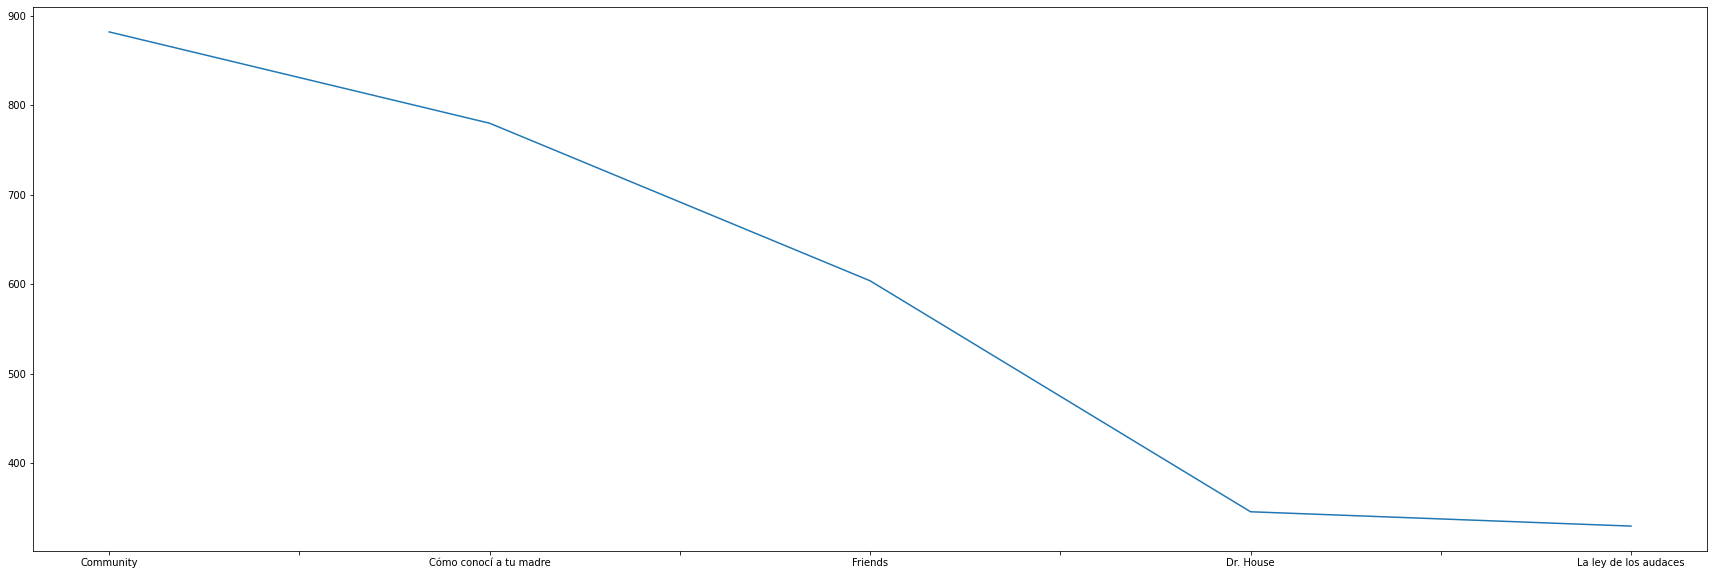

In [13]:
#Agarro los N numeros más largos
OcurrenciasSeries = OcurrenciasSeries.nlargest(N)
plt.figure(figsize = (30,10))
#Pandas tiene para plotear DataFrames
OcurrenciasSeries.plot()


In [14]:
TablaSeries

,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark
0,2022-08-21 19:54:53,174,Community,Apple Apple TV 4 Apple TV,175,175
1,2022-08-21 19:33:17,1293,Community,Apple Apple TV 4 Apple TV,1293,1293
2,2022-08-21 19:11:40,1288,Community,Apple Apple TV 4 Apple TV,1288,1288
3,2022-08-21 18:50:27,1241,Community,Apple Apple TV 4 Apple TV,1262,1262
4,2022-08-21 18:16:34,1280,Community,Apple Apple TV 4 Apple TV,1281,1281
...,...,...,...,...,...,...
6286,2015-01-08 19:21:21,249,Lost,Apple TV 3 (revised),280,0
6287,2015-01-08 19:20:47,15,Lost,Apple TV 3 (revised),14,0
6288,2015-01-08 19:18:32,37,Lost,Apple TV 3 (revised),37,0
6289,2015-01-08 19:16:45,18,Lost,Apple TV 3 (revised),18,0


<Figure size 2160x720 with 0 Axes>

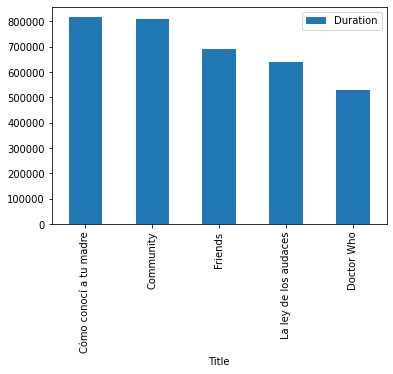

In [15]:
TiempoVisto = TablaSeries.groupby(by = ['Title'], group_keys= False).sum()
#Con esto, sumo todas las duraciones de los que tienen el mismo nombre
TiempoVisto = TiempoVisto.sort_values(by=['Duration'], ascending = False)

#Saco columnas que no quiero para plotear
TiempoVisto = TiempoVisto.drop("Bookmark", axis=1)
TiempoVisto = TiempoVisto.drop("Latest Bookmark", axis=1)

#Lo mismo que antes
TiempoVistoN = TiempoVisto.nlargest(N, columns ="Duration")
plt.figure(figsize = (30,10))
TiempoVistoN.plot(kind = "bar")


# 4. Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

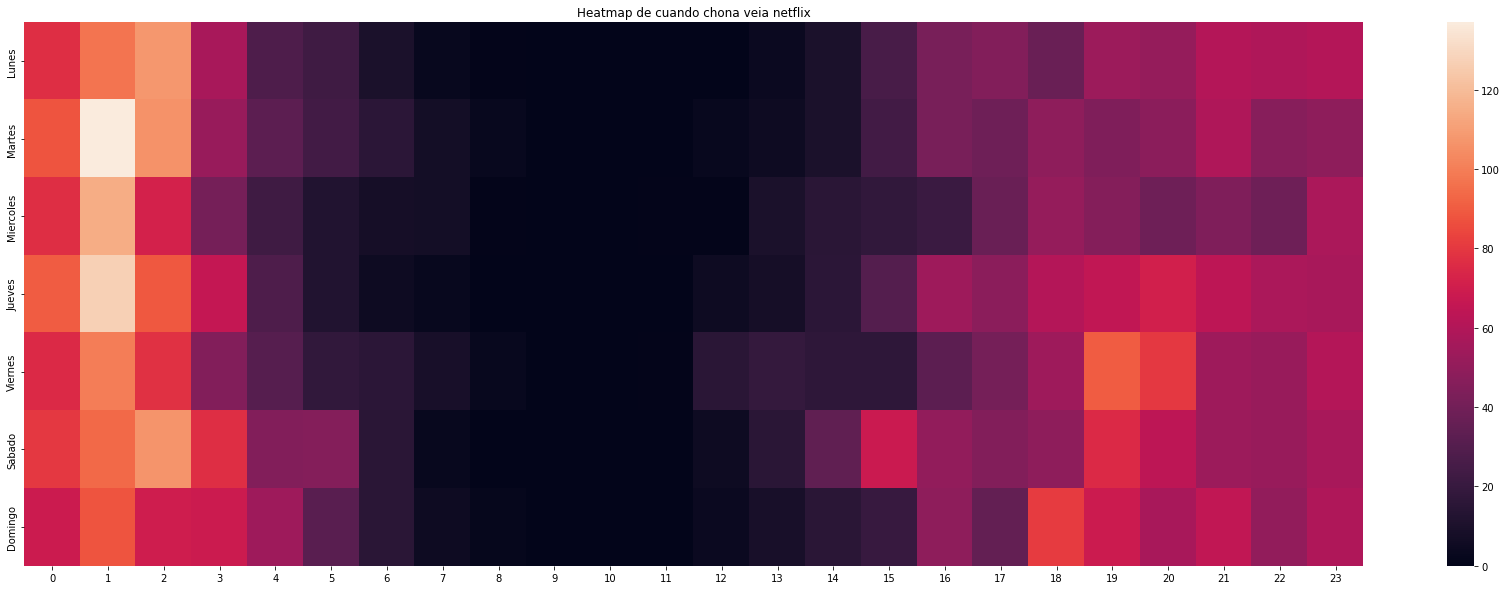

In [16]:
#Nueva Tabla donde voy a poner Horas, Dias y Años
TablaSemanas =  Tabla

TablaSemanas['Week_Number'] = TablaSemanas["Start Time"].dt.day_of_week
TablaSemanas['Hour_Number'] = TablaSemanas["Start Time"].dt.hour
TablaSemanas['Year_Number'] = TablaSemanas["Start Time"].dt.isocalendar().year

def NormalizarDia (numdia):
  dia = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
  return dia[numdia]

#No me gustan los numeros, quiero textos
TablaSemanas["Dia"] = TablaSemanas["Week_Number"].apply(NormalizarDia)

#Saco todas las columnas que no me gustan
TablaSemanas = TablaSemanas.drop(columns = "Week_Number")

TablaSemanas = TablaSemanas.drop("Duration", axis=1)
TablaSemanas = TablaSemanas.drop("Title", axis=1)
TablaSemanas = TablaSemanas.drop("Device Type", axis=1)
TablaSemanas = TablaSemanas.drop("Bookmark", axis=1)
TablaSemanas = TablaSemanas.drop("Latest Bookmark", axis=1)
TablaSemanas = TablaSemanas.drop("Start Time", axis=1)
TablaSemanas = TablaSemanas.drop("Year_Number", axis=1)

#Creo un nuevo DataFrame e Itero por cada dia y hora
dia = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
dic = pd.DataFrame()
for hour in range(0, 24):
  for day in dia:
    dic.at[day, hour] = TablaSemanas[(TablaSemanas['Dia'] == day) & (TablaSemanas["Hour_Number"] == hour)].count()[0]

#Heatmap para cada hora en cada dia de la semana
plt.figure(figsize = (30,10))
plt.title("Heatmap de cuando chona veia netflix")
sns.heatmap(dic)



# 5. Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

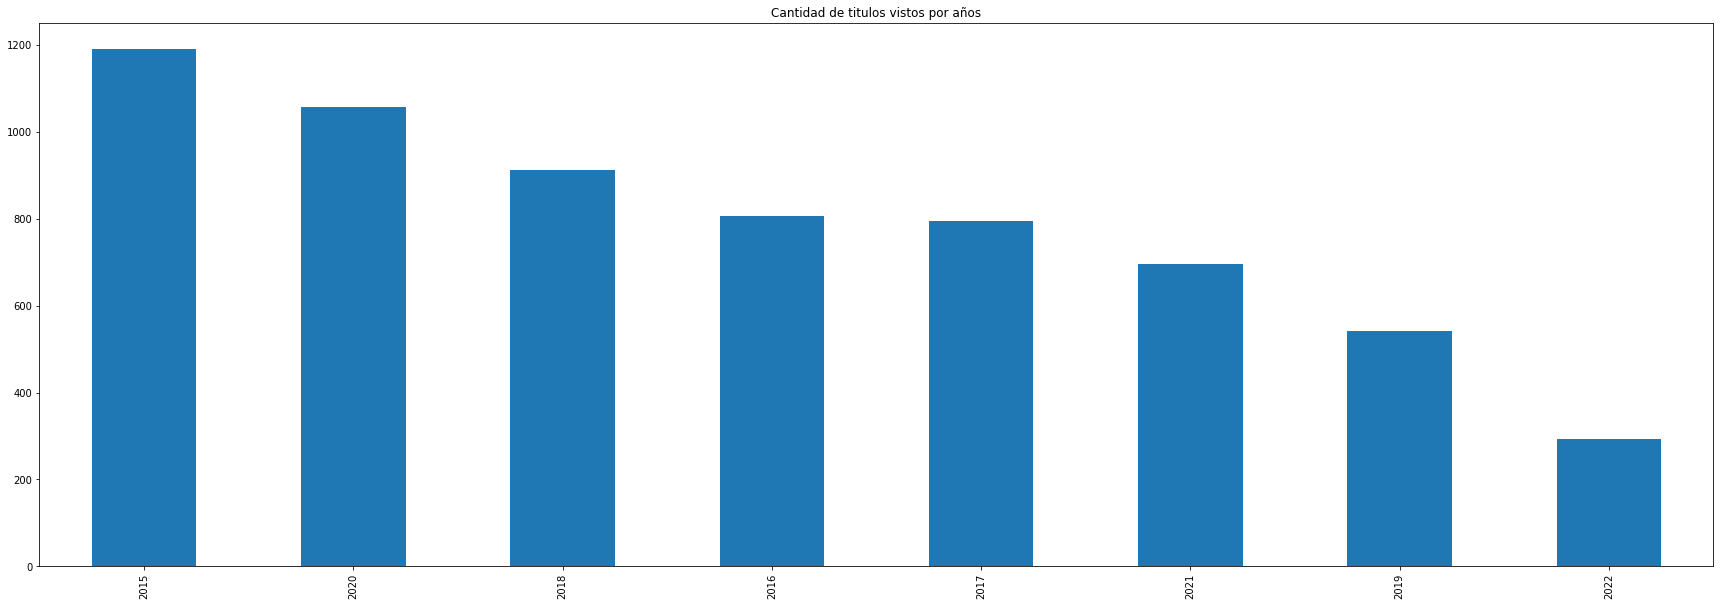

In [17]:
#Medio Evidente, veo la cantidad de iteraciones de cada dia y la ploteo
Cant = Tabla["Year_Number"].value_counts()

plt.figure(figsize = (30,10))
plt.title("Cantidad de titulos vistos por años")
Cant.plot(x = "Year_Number", kind = "bar")

# 6.Total de días de todos los títulos reproducidos.

In [24]:
#Hago lo mismo que hice en el punto 3 y agrupo por el mismo titulo
DuracionPelis = TablaPeliculas.groupby(by=['Title'], group_keys= False).sum()
DuracionPelis = DuracionPelis.sort_values(by=["Duration"], ascending = False)

#Saco columnas que no me gustan
DuracionPelis = DuracionPelis.drop("Bookmark", axis = 1)
DuracionPelis = DuracionPelis.drop("Latest Bookmark", axis = 1)

#Divido la duración a dias
TiempoSeries = TiempoVisto["Duration"]/60/60
TiempoPelis = DuracionPelis["Duration"]/60/60

#Printeo
TiempoSeries

Title
Cómo conocí a tu madre                226.925278
Community                             224.321111
Friends                               191.926667
La ley de los audaces                 177.049167
Doctor Who                            147.312500
                                         ...    
Season 2 Main Character Intro Clip      0.001111
Marvel - The Punisher                   0.001111
World's Most Wanted                     0.001111
El arte del espionaje                   0.001111
Especial 20 años Fútbol de Primera      0.000556
Name: Duration, Length: 167, dtype: float64

In [25]:
#Printeo
TiempoPelis

Title
Star Wars: El Imperio contraataca    8.175833
Iron Man: El Hombre de Hierro        6.032778
Star Wars: Una nueva esperanza       5.665000
El código enigma                     5.562500
Supercool                            5.466667
                                       ...   
Alex                                 0.001111
¿Quién *&$%! son los Miller?         0.000833
Mente indomable                      0.000833
NullCompleteVideo                    0.000556
Desnudo                              0.000278
Name: Duration, Length: 175, dtype: float64

#BONUS

##BONUS 1

Claramente en el punto 6 se puede ver que la peli más vista de Star Wars es el imperio contrataca.